
### Association rules mining using FP-GROWTH

Let's start by opening the data and understading it's content. 


<Axes: >

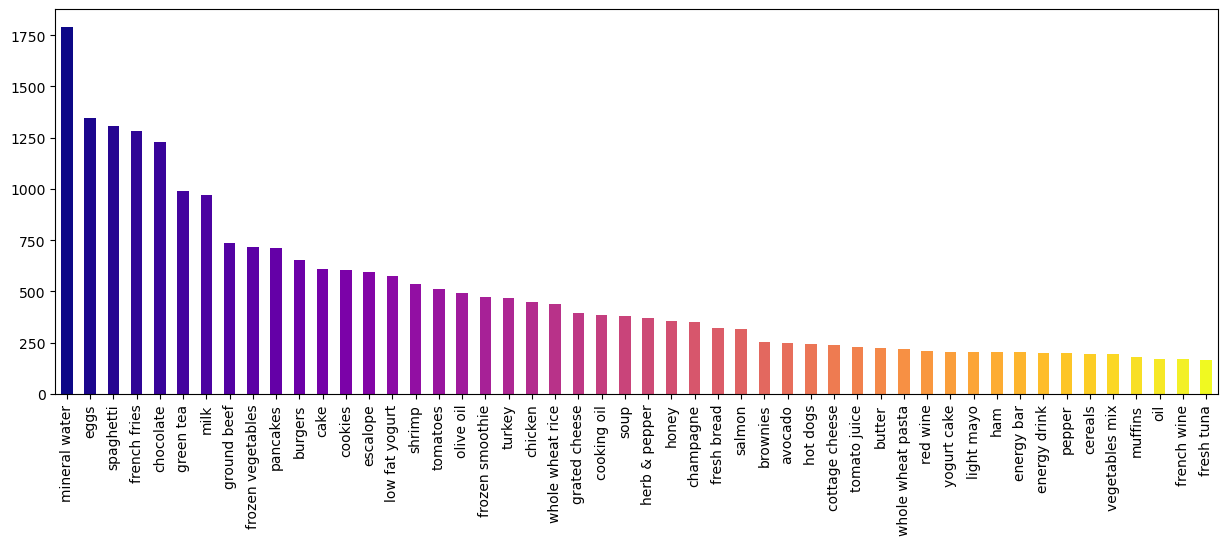

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



db = pd.read_csv('supermarket_marketing/Market_Basket_Optimisation.csv', header=None, sep=",")
db.stack().value_counts()[:50].plot.bar(figsize =(15,5), color = plt.cm.plasma(np.linspace(0, 1, 50)) )


Using mlxtend to extract association rules

In [5]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules

itemsets_list = db.stack().groupby(level=0).apply(list).tolist()

te = TransactionEncoder()
te_ary = te.fit(itemsets_list).transform(itemsets_list)

df = pd.DataFrame(te_ary, columns=te.columns_)

res = fpgrowth(df, min_support=0.009,use_colnames=True)
res = association_rules(res, metric='confidence', min_threshold=0.3)

res

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(low fat yogurt),(mineral water),0.076523,0.238368,0.023997,0.313589,1.315565,0.005756,1.109585
1,(shrimp),(mineral water),0.071457,0.238368,0.023597,0.330224,1.385352,0.006564,1.137144
2,(olive oil),(mineral water),0.065858,0.238368,0.027596,0.419028,1.757904,0.011898,1.310962
3,(olive oil),(spaghetti),0.065858,0.174110,0.022930,0.348178,1.999758,0.011464,1.267048
4,"(spaghetti, olive oil)",(mineral water),0.022930,0.238368,0.010265,0.447674,1.878079,0.004799,1.378954
...,...,...,...,...,...,...,...,...,...
75,(herb & pepper),(mineral water),0.049460,0.238368,0.017064,0.345013,1.447397,0.005275,1.162821
76,(herb & pepper),(ground beef),0.049460,0.098254,0.015998,0.323450,3.291994,0.011138,1.332860
77,(herb & pepper),(spaghetti),0.049460,0.174110,0.016264,0.328841,1.888695,0.007653,1.230543
78,(cake),(mineral water),0.081056,0.238368,0.027463,0.338816,1.421397,0.008142,1.151921


Visualizing association rules with network graph using pyVis

In [12]:
from pyvis.network import Network

association_net = Network(height="750px", width="90%", bgcolor="#222222", font_color="white")

for x in res.itertuples() :
    for y in x[1] :
        association_net.add_node(y, y, title = y)
        association_net.add_node(list(x[2])[0], list(x[2])[0], title = list(x[2])[0])
        association_net.add_edge(y, list(x[2])[0], value = x[5])

association_net.show("net.html")
    
